In [36]:
"""
Categorical Data This section introcudes the pandss Categorical type. 

Frequnetly, a cloumns in a table may contain repeated instances of a smaller set od distincit values. 

FUcntions like unique and value_counts, which enable us to extract the distinct values form an array and compute their frequqncies,

"""

import numpy as np; import pandas as pd

values = pd.Series(['apple', 'orange', 'apple',
                   'apple'] * 2)


custom_dataset = pd.read_csv('ratios_vals_money.csv',
                             infer_datetime_format=True,
                             parse_dates=True,
                             index_col=['Ticker','Year']
                             )


display(
    f"these are the values {values}"
)


display(pd.unique(values))

display(pd.value_counts(values))

# Many data systems have developed sepcialized a[[roaches for representing data with repeated values for optiamal storage
# and computaion. In data wareshousing, a best practice is to use so called simension tables cantaning the distinct values
# and storing the primary observations as interger leys refreshing the dimension table]]

vals = pd.Series([0,1,0,0] * 2)

dim = pd.Series(['apple', 'orange'])

display(vals,dim)

# Use the take method to restore the original serieos of strings

display(dim.take(vals))

'these are the values 0     apple\n1    orange\n2     apple\n3     apple\n4     apple\n5    orange\n6     apple\n7     apple\ndtype: object'

array(['apple', 'orange'], dtype=object)

apple     6
orange    2
dtype: int64

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

0     apple
1    orange
dtype: object

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [37]:
"""
This representation is called the categorical or dictionary_encoded representaion.
The array of distinct values can be called the categories, dictionary, or levels of data the data.
In this book we wiil use the terms categorical and categories.
The integer vals that refence the categoriess are called the category codes or simply codes.

Caategorical representation can yield significant performance improvements when doing analytics

Categorical Type in pandas: Pndas has a special Categorical type for holdong data that uses integer-vased catergorical 
representation or encoding. 

"""


fruits = ['apple', 'orange', 'apple', 'apple'] * 2 


N = len(fruits)


df = pd.DataFrame({'fruit': fruits,
                  'basket_id': np.arange(N),
                  'count': np.random.randint(3, 15, size=N),
                  'weight': np.random.uniform(0, 4, size=N)},
                columns=['basket_id', 'fruit', 'count', 'weight'])


display(df)

# Here df['fruit'] is am array pf python string objects. we can convert it to categotical by calling:

fruit_cat = df['fruit'].astype('category')

display(fruit_cat) # values for fruit_cat are not Numpy array, but an instance of pandas.Cetegorical:

c = fruit_cat.values

display(type(c))

# The Categorical object has categories and codes attributes:

display(c.categories)

display(c.codes)

# You can convert a df column to categorical by assigning the converted result:

df['count'] = df['count'].astype('category')

display(df.count)

# you can also create pd.Categorical directly from other types of Py sequences:

my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

display(my_categories)

# If you have obtained categorical encoded data from enaother source, ypu can ise the alternative from_codes constructor:

categories = ['foo','bar','baz', 'hang']

codes = [0, 1, 2, 0, 0, 1]

my_cats_2 = pd.Categorical.from_codes(codes, categories)

display(my_cats_2)

# Unless specidied, categorical conversions assume no specific orfering of the categories. So the categories array may be
# in a diffrent order depending on the ordering of the input data. WHen using from_codes or any of the other constructors 
# you can indicate that the categories have a meaningful ordering:

ordered_cat = pd.Categorical.from_codes(codes,categories,
                                        ordered=True)


display(ordered_cat)

display(my_cats_2.as_ordered())

,basket_id,fruit,count,weight
0,0,apple,6,1.697275
1,1,orange,10,2.963134
2,2,apple,4,0.252656
3,3,apple,6,2.678084
4,4,apple,7,3.693899
5,5,orange,10,2.551818
6,6,apple,14,0.787548
7,7,apple,3,3.735868


0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

pandas.core.arrays.categorical.Categorical

Index(['apple', 'orange'], dtype='object')

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

<bound method DataFrame.count of    basket_id   fruit count    weight
0          0   apple     6  1.697275
1          1  orange    10  2.963134
2          2   apple     4  0.252656
3          3   apple     6  2.678084
4          4   apple     7  3.693899
5          5  orange    10  2.551818
6          6   apple    14  0.787548
7          7   apple     3  3.735868>

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (4, object): ['foo', 'bar', 'baz', 'hang']

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (4, object): ['foo' < 'bar' < 'baz' < 'hang']

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (4, object): ['foo' < 'bar' < 'baz' < 'hang']

In [38]:
df

,basket_id,fruit,count,weight
0,0,apple,6,1.697275
1,1,orange,10,2.963134
2,2,apple,4,0.252656
3,3,apple,6,2.678084
4,4,apple,7,3.693899
5,5,orange,10,2.551818
6,6,apple,14,0.787548
7,7,apple,3,3.735868


In [44]:
"""
Computations with Categoricals.
Using Categorical in pandas compared with the non-encoded version (like an array of strings) generally bahaves the same way.
Some parts of pandas, like the groupby function, perform better when working with categoricals.
There are also some fucntions that can utilize the ordered flag.

Using random numeric data, and use pandas.qcut binnig function, This return pandas.Categotical
"""

np.random.seed(12345)

draws = np.random.randn(1000)

draws[:5]

# Computing a quartile binning of this data and extract some statistics:

bins = pd.qcut(draws, 4)

display(bins)

# The exact sample quartiles may be less useful for a repost than quartile names. For this use the labels arg to qcut.

binss = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

display(binss)

display(binss.codes[:10])


# The labeled bins categorical does not contain information about the bin edges in he data,
#so we caan use groupby to extract some summary statistics:

stat_bins = pd.Series(binss, name='quartile')

results = (pd.Series(draws)
           .groupby(stat_bins)
           .agg(['count', 'min','max'])
           .reset_index())

display(results)


display(results['quartile'])

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

['Q2', 'Q3', 'Q2', 'Q2', 'Q4', ..., 'Q3', 'Q2', 'Q1', 'Q3', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [80]:
''' WE create a python/ pandas object called a series:
        To turn to dataframe add pair of [] brakets to alreadt existing set.
        Add columns to data by inclsing name with quotes inside [].
'''


series_close = custom_dataset['Revenue'][:50]


labels = custom_dataset['Asets/Liabili'][:50]

# Now we convert labels to categorical 

categories = labels.astype('category')

display(categories.memory_usage())

display(labels.memory_usage())

# GroupBy operations can be significatly faster with categoricals becaouse the udnerlying algorithms use the integer-based
# codes array instead of an array of strings

stock_daata = custom_dataset[:5]

85784

83630

In [81]:
stock_daata['pct_change'] = stock_daata['Close'].pct_change()

stock_daata['Returns'] = np.log(stock_daata['Close'] / stock_daata['Close'].shift(1))

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='Ticker,Year'>

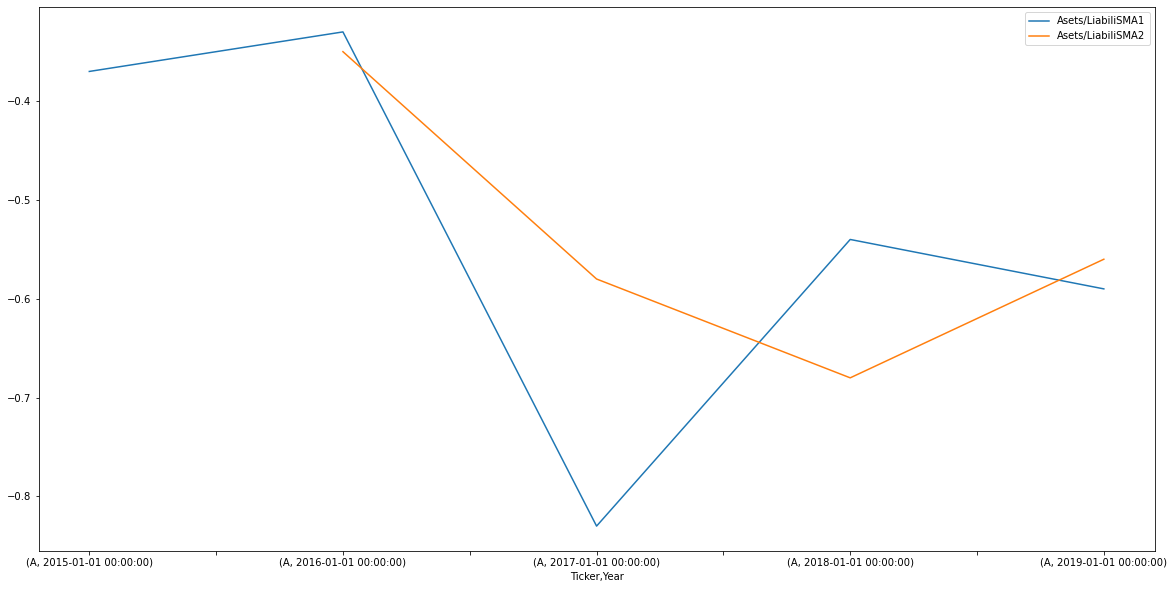

In [88]:

SMA1 = 1 # Shorter SMA
SMA2 = 2 # Longer SMA

stock_daata['Asets/LiabiliSMA1'] = stock_daata['Asets/Liabili'].rolling(SMA1).mean() # Shorter SMA
stock_daata['Asets/LiabiliSMA2'] = stock_daata['Asets/Liabili'].rolling(SMA2).mean() # Longer SMA

stock_daata[['Asets/LiabiliSMA1','Asets/LiabiliSMA2']].round(2).plot(figsize=(20, 10))

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='Ticker,Year'>

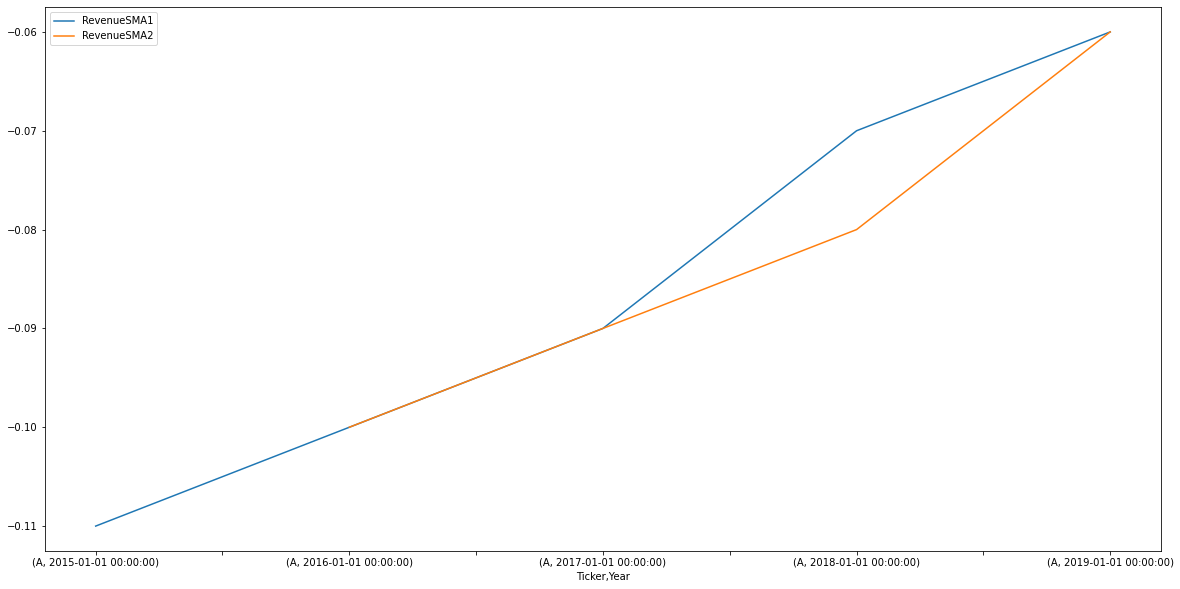

In [87]:
SMA1 = 1 # Shorter SMA
SMA2 = 2 # Longer SMA

stock_daata['RevenueSMA1'] = stock_daata['Revenue'].rolling(SMA1).mean() # Shorter SMA
stock_daata['RevenueSMA2'] = stock_daata['Revenue'].rolling(SMA2).mean() # Longer SMA

stock_daata[['RevenueSMA1','RevenueSMA2']].round(2).plot(figsize=(20, 10))

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


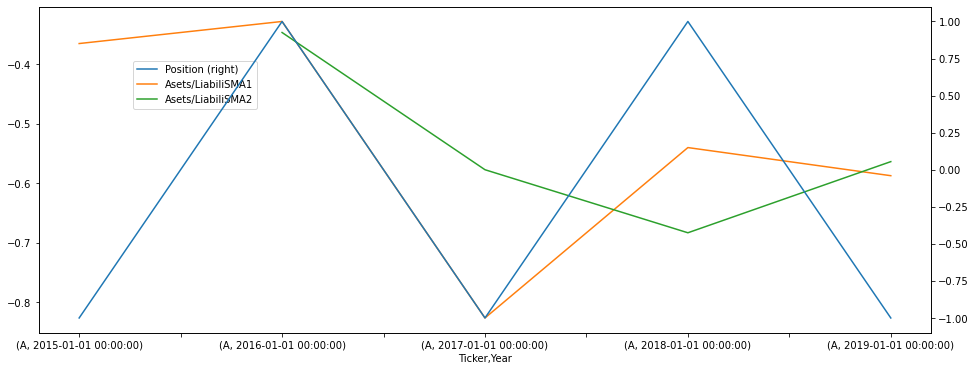

In [97]:
stock_daata['Position'] = np.where(stock_daata['Asets/LiabiliSMA1'] > stock_daata['Asets/LiabiliSMA2'], 1, -1)

ax = stock_daata[['Position', 'Asets/LiabiliSMA1','Asets/LiabiliSMA2']].plot(secondary_y='Position', figsize=(16,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

cat_data = stock_daata[['Close',
             'Returns',
             'SMA1',
             'SMA2',
             'RevenueSMA1',
             'RevenueSMA2',
             'Asets/LiabiliSMA1',
             'Asets/LiabiliSMA2',
             'Position']]

In [128]:
cat_s = cat_data['Position'].astype('category')


# The special attribute cat provides acces to categotical methods

display(cat_s.cat.codes)

display(cat_s.cat.categories)

cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

display(cat_s3)

# Categorical methods for series in pandas pagges 378

# When using ml tools, youll need to transform categorical data into dummy varrs also known as one hot encoding.
series_data =  cat_data['Position']

display(pd.get_dummies(series_data))

Ticker  Year      
A       2015-01-01    0
        2016-01-01    1
        2017-01-01    0
        2018-01-01    1
        2019-01-01    0
dtype: int8

Int64Index([-1, 1], dtype='int64')

Series([], Name: Position, dtype: category
Categories (2, int64): [-1, 1])

-1   1
Ticker Year              
A      2015-01-01   1   0
       2016-01-01   0   1
       2017-01-01   1   0
       2018-01-01   0   1
       2019-01-01   1   0

In [157]:
"""
# Advanced GroupBy Use 
"""


g = cat_data.groupby('RevenueSMA2')

display(g.mean())

,Close,Returns,SMA1,SMA2,RevenueSMA1,Asets/LiabiliSMA1,Asets/LiabiliSMA2,Position
RevenueSMA2,,,,,,,,
-0.102965,43.370,0.090888,43.370,41.4860,-0.099310,-0.328392,-0.346920,1
-0.093293,59.330,0.313347,59.330,51.3500,-0.087275,-0.826095,-0.577243,-1
-0.077424,67.169,0.124097,67.169,63.2495,-0.067574,-0.540063,-0.683079,1
-0.062024,75.212,0.113099,75.212,71.1905,-0.056475,-0.587271,-0.563667,-1
